In [224]:
# Importing Relevant Functions
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.pyplot as plt

In [225]:
df = pd.read_csv('IndianFloodInventroy(IFI).csv')

In [226]:
df

,UEI,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,Longitude,Severity,Area Affected,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Souce ID
0,UEI-DFO-FL-1985-0001,1985-06-23,1985-06-27,4.0,Heavy rain,NaN,NaN,NaN,14.5398,75.0937,1.0,254234.60,95,NaN,25000.0,NaN,NaN,NaN,DFO,27
1,UEI-DFO-FL-1985-0002,1985-07-18,1985-07-30,12.0,Heavy rain,NaN,NaN,NaN,32.8353,76.9103,1.0,117441.17,340,NaN,20000.0,NaN,NaN,NaN,DFO,33
2,UEI-DFO-FL-1985-0003,1985-09-13,1985-10-15,32.0,Heavy rain,NaN,NaN,NaN,26.4816,82.8434,2.0,89994.67,557,NaN,152000.0,NaN,NaN,NaN,DFO,53
3,UEI-DFO-FL-1985-0004,1985-10-18,1985-10-20,2.0,Tropical cyclone,NaN,NaN,NaN,21.1495,86.7154,2.0,46758.64,49,NaN,150000.0,NaN,NaN,NaN,DFO,61
4,UEI-DFO-FL-1986-0001,1986-06-15,1986-08-20,66.0,Monsoonal rain,NaN,NaN,NaN,25.6339,84.0726,1.0,507167.44,258,NaN,3040000.0,NaN,NaN,NaN,DFO,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,UEI-IMD-FL-2016-0131,2016-07-21,2016-07-23,3.0,landslide,NaN,Dehradun,Uttarakhand,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,11 persons died.,NaN,IMD,NaN
4734,UEI-IMD-FL-2016-0132,2016-07-20,2016-07-20,1.0,heavy rains & landslides,NaN,Darjeeling,West Bengal,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3 persons died due to landslide.,NaN,IMD,NaN
4735,UEI-IMD-FL-2016-0133,2016-07-24,2016-07-25,2.0,flood,NaN,"Alipurdusar, Cooch Behar, Darjeeling, Jalpaiguri",West Bengal,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,4 persons died.,58000 people affected.,IMD,NaN
4736,UEI-IMD-FL-2016-0134,2016-08-17,2016-08-17,1.0,heavy rains,NaN,Kolkata,West Bengal,NaN,NaN,NaN,NaN,3,15,NaN,NaN,3 persons died and 15 others injured.,Several trees/electric poles uprooted causing ...,IMD,NaN


In [227]:
df.isnull().sum()

UEI                                     0
Start Date                              0
End Date                                0
Duration(Days)                        148
Main Cause                            138
Location                             4462
Districts                             617
State                                 563
Latitude                             4413
Longitude                            4413
Severity                             4476
Area Affected                        4476
Human fatality                       2022
Human injured                        3914
Human Displaced                      4476
Animal Fatality                      4433
Description of Casualties/injured    1893
Extent of damage                     1449
Event Source                            0
Event Souce ID                       4175
dtype: int64

In [228]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4738 entries, 0 to 4737
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UEI                                4738 non-null   object 
 1   Start Date                         4738 non-null   object 
 2   End Date                           4738 non-null   object 
 3   Duration(Days)                     4590 non-null   float64
 4   Main Cause                         4600 non-null   object 
 5   Location                           276 non-null    object 
 6   Districts                          4121 non-null   object 
 7   State                              4175 non-null   object 
 8   Latitude                           325 non-null    float64
 9   Longitude                          325 non-null    float64
 10  Severity                           262 non-null    float64
 11  Area Affected                      262 non-null    float

In [229]:
print("Head of DataFrame:")
print(df.head())


Head of DataFrame:
                    UEI  Start Date    End Date  Duration(Days)  \
0  UEI-DFO-FL-1985-0001  1985-06-23  1985-06-27             4.0   
1  UEI-DFO-FL-1985-0002  1985-07-18  1985-07-30            12.0   
2  UEI-DFO-FL-1985-0003  1985-09-13  1985-10-15            32.0   
3  UEI-DFO-FL-1985-0004  1985-10-18  1985-10-20             2.0   
4  UEI-DFO-FL-1986-0001  1986-06-15  1986-08-20            66.0   

         Main Cause Location Districts State  Latitude  Longitude  Severity  \
0        Heavy rain      NaN       NaN   NaN   14.5398    75.0937       1.0   
1        Heavy rain      NaN       NaN   NaN   32.8353    76.9103       1.0   
2        Heavy rain      NaN       NaN   NaN   26.4816    82.8434       2.0   
3  Tropical cyclone      NaN       NaN   NaN   21.1495    86.7154       2.0   
4    Monsoonal rain      NaN       NaN   NaN   25.6339    84.0726       1.0   

   Area Affected Human fatality Human injured  Human Displaced  \
0      254234.60             95      

In [230]:
print("Rows with NaN values:")
print(df[df.isnull().any(axis=1)])


Rows with NaN values:
                       UEI  Start Date    End Date  Duration(Days)  \
0     UEI-DFO-FL-1985-0001  1985-06-23  1985-06-27             4.0   
1     UEI-DFO-FL-1985-0002  1985-07-18  1985-07-30            12.0   
2     UEI-DFO-FL-1985-0003  1985-09-13  1985-10-15            32.0   
3     UEI-DFO-FL-1985-0004  1985-10-18  1985-10-20             2.0   
4     UEI-DFO-FL-1986-0001  1986-06-15  1986-08-20            66.0   
...                    ...         ...         ...             ...   
4733  UEI-IMD-FL-2016-0131  2016-07-21  2016-07-23             3.0   
4734  UEI-IMD-FL-2016-0132  2016-07-20  2016-07-20             1.0   
4735  UEI-IMD-FL-2016-0133  2016-07-24  2016-07-25             2.0   
4736  UEI-IMD-FL-2016-0134  2016-08-17  2016-08-17             1.0   
4737  UEI-IMD-FL-2016-0135  2016-08-23  2016-08-29             7.0   

                                  Main Cause Location  \
0                                 Heavy rain      NaN   
1                      

In [231]:
df_cleaned = df.fillna(value='Unknown')

In [232]:
df_cleaned

,UEI,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,Longitude,Severity,Area Affected,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Souce ID
0,UEI-DFO-FL-1985-0001,1985-06-23,1985-06-27,4.0,Heavy rain,Unknown,Unknown,Unknown,14.5398,75.0937,1.0,254234.6,95,Unknown,25000.0,Unknown,Unknown,Unknown,DFO,27
1,UEI-DFO-FL-1985-0002,1985-07-18,1985-07-30,12.0,Heavy rain,Unknown,Unknown,Unknown,32.8353,76.9103,1.0,117441.17,340,Unknown,20000.0,Unknown,Unknown,Unknown,DFO,33
2,UEI-DFO-FL-1985-0003,1985-09-13,1985-10-15,32.0,Heavy rain,Unknown,Unknown,Unknown,26.4816,82.8434,2.0,89994.67,557,Unknown,152000.0,Unknown,Unknown,Unknown,DFO,53
3,UEI-DFO-FL-1985-0004,1985-10-18,1985-10-20,2.0,Tropical cyclone,Unknown,Unknown,Unknown,21.1495,86.7154,2.0,46758.64,49,Unknown,150000.0,Unknown,Unknown,Unknown,DFO,61
4,UEI-DFO-FL-1986-0001,1986-06-15,1986-08-20,66.0,Monsoonal rain,Unknown,Unknown,Unknown,25.6339,84.0726,1.0,507167.44,258,Unknown,3040000.0,Unknown,Unknown,Unknown,DFO,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,UEI-IMD-FL-2016-0131,2016-07-21,2016-07-23,3.0,landslide,Unknown,Dehradun,Uttarakhand,Unknown,Unknown,Unknown,Unknown,11,Unknown,Unknown,Unknown,11 persons died.,Unknown,IMD,Unknown
4734,UEI-IMD-FL-2016-0132,2016-07-20,2016-07-20,1.0,heavy rains & landslides,Unknown,Darjeeling,West Bengal,Unknown,Unknown,Unknown,Unknown,3,Unknown,Unknown,Unknown,3 persons died due to landslide.,Unknown,IMD,Unknown
4735,UEI-IMD-FL-2016-0133,2016-07-24,2016-07-25,2.0,flood,Unknown,"Alipurdusar, Cooch Behar, Darjeeling, Jalpaiguri",West Bengal,Unknown,Unknown,Unknown,Unknown,4,Unknown,Unknown,Unknown,4 persons died.,58000 people affected.,IMD,Unknown
4736,UEI-IMD-FL-2016-0134,2016-08-17,2016-08-17,1.0,heavy rains,Unknown,Kolkata,West Bengal,Unknown,Unknown,Unknown,Unknown,3,15,Unknown,Unknown,3 persons died and 15 others injured.,Several trees/electric poles uprooted causing ...,IMD,Unknown


In [233]:
import pandas as pd

# Assuming df_cleaned is your DataFrame
columns_to_convert = ['Area Affected', 'Human fatality', 'Human injured']  # Replace with your actual column names

# Convert selected columns to numeric
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Convert numeric columns to integers
# Example: Filling NaN values with 0
df_cleaned[columns_to_convert] = df_cleaned[columns_to_convert].fillna(0).astype(int)


# Print the DataFrame after converting columns to integers
print("DataFrame with selected columns in integer format:")
print(df_cleaned)


DataFrame with selected columns in integer format:
                       UEI  Start Date    End Date Duration(Days)  \
0     UEI-DFO-FL-1985-0001  1985-06-23  1985-06-27            4.0   
1     UEI-DFO-FL-1985-0002  1985-07-18  1985-07-30           12.0   
2     UEI-DFO-FL-1985-0003  1985-09-13  1985-10-15           32.0   
3     UEI-DFO-FL-1985-0004  1985-10-18  1985-10-20            2.0   
4     UEI-DFO-FL-1986-0001  1986-06-15  1986-08-20           66.0   
...                    ...         ...         ...            ...   
4733  UEI-IMD-FL-2016-0131  2016-07-21  2016-07-23            3.0   
4734  UEI-IMD-FL-2016-0132  2016-07-20  2016-07-20            1.0   
4735  UEI-IMD-FL-2016-0133  2016-07-24  2016-07-25            2.0   
4736  UEI-IMD-FL-2016-0134  2016-08-17  2016-08-17            1.0   
4737  UEI-IMD-FL-2016-0135  2016-08-23  2016-08-29            7.0   

                                  Main Cause Location  \
0                                 Heavy rain  Unknown   
1     

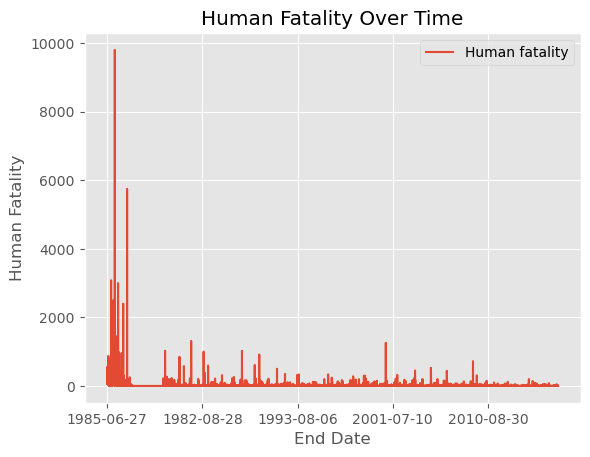

In [234]:
df_cleaned.plot(x='End Date', y='Human fatality')
plt.title('Human Fatality Over Time')  # Add your desired title here
plt.xlabel('End Date')
plt.ylabel('Human Fatality')
plt.show()

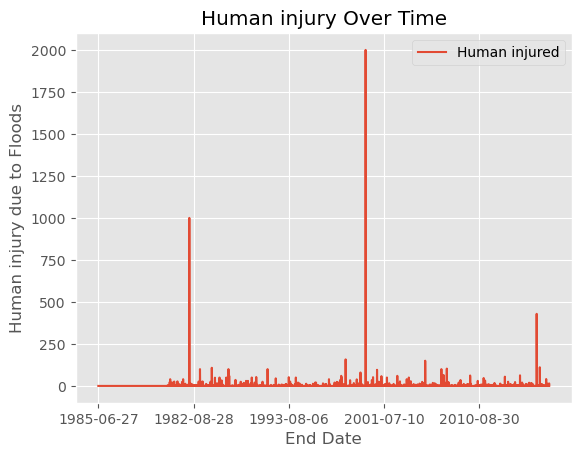

In [235]:
df_cleaned.plot(x='End Date', y='Human injured' )
plt.title('Human injury Over Time')  
plt.ylabel('Human injury due to Floods')
plt.show()

In [236]:
df_cleaned['Start Date'] = pd.to_datetime(df['Start Date'], errors = 'coerce')
df_cleaned['End Date'] = pd.to_datetime(df['End Date'], errors = 'coerce')

C:\Users\abbur\AppData\Local\Temp\ipykernel_3744\2701567475.py:2: UserWarning: Parsing '31/09/1992' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cleaned['End Date'] = pd.to_datetime(df['End Date'], errors = 'coerce')
C:\Users\abbur\AppData\Local\Temp\ipykernel_3744\2701567475.py:2: UserWarning: Parsing '31/06/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_cleaned['End Date'] = pd.to_datetime(df['End Date'], errors = 'coerce')


In [237]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4738 entries, 0 to 4737
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   UEI                                4738 non-null   object        
 1   Start Date                         4737 non-null   datetime64[ns]
 2   End Date                           4735 non-null   datetime64[ns]
 3   Duration(Days)                     4738 non-null   object        
 4   Main Cause                         4738 non-null   object        
 5   Location                           4738 non-null   object        
 6   Districts                          4738 non-null   object        
 7   State                              4738 non-null   object        
 8   Latitude                           4738 non-null   object        
 9   Longitude                          4738 non-null   object        
 10  Severity                           4

In [238]:
# Filtering by Year greater than 2000 (relvancy)
df_filtered = df_cleaned[df_cleaned['Start Date'].dt.year >= 2000]

In [239]:
df_filtered

,UEI,Start Date,End Date,Duration(Days),Main Cause,Location,Districts,State,Latitude,Longitude,Severity,Area Affected,Human fatality,Human injured,Human Displaced,Animal Fatality,Description of Casualties/injured,Extent of damage,Event Source,Event Souce ID
81,UEI-DFO-FL-2000-0001,2000-10-06,2000-06-16,Unknown,"Dam/Levy, break or release",Unknown,Unknown,Unknown,27.4268,94.7981,2.0,55286,30,0,50000.0,Unknown,Unknown,Unknown,DFO,1606
82,UEI-DFO-FL-2000-0002,2000-07-31,2000-04-08,Unknown,Torrential rain,Unknown,Unknown,Unknown,31.806,77.6925,1.0,12415,140,0,4000.0,Unknown,Unknown,Unknown,DFO,1616
83,UEI-DFO-FL-2000-0003,2000-02-08,2000-08-30,204.0,Monsoonal rain,Unknown,Unknown,Unknown,27.094,94.643,1.0,326457,637,0,10504000.0,Unknown,Unknown,Unknown,DFO,1617
84,UEI-DFO-FL-2000-0004,2000-08-23,2000-08-31,8.0,Torrential rain,Unknown,Unknown,Unknown,17.1335,79.2098,2.0,129459,162,0,3000000.0,Unknown,Unknown,Unknown,DFO,1623
85,UEI-DFO-FL-2000-0005,2000-08-29,2000-09-14,16.0,Monsoonal rain,Unknown,Unknown,Unknown,26.9607,80.4678,1.0,223178,578,0,0.0,Unknown,Unknown,Unknown,DFO,1626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4733,UEI-IMD-FL-2016-0131,2016-07-21,2016-07-23,3.0,landslide,Unknown,Dehradun,Uttarakhand,Unknown,Unknown,Unknown,0,11,0,Unknown,Unknown,11 persons died.,Unknown,IMD,Unknown
4734,UEI-IMD-FL-2016-0132,2016-07-20,2016-07-20,1.0,heavy rains & landslides,Unknown,Darjeeling,West Bengal,Unknown,Unknown,Unknown,0,3,0,Unknown,Unknown,3 persons died due to landslide.,Unknown,IMD,Unknown
4735,UEI-IMD-FL-2016-0133,2016-07-24,2016-07-25,2.0,flood,Unknown,"Alipurdusar, Cooch Behar, Darjeeling, Jalpaiguri",West Bengal,Unknown,Unknown,Unknown,0,4,0,Unknown,Unknown,4 persons died.,58000 people affected.,IMD,Unknown
4736,UEI-IMD-FL-2016-0134,2016-08-17,2016-08-17,1.0,heavy rains,Unknown,Kolkata,West Bengal,Unknown,Unknown,Unknown,0,3,15,Unknown,Unknown,3 persons died and 15 others injured.,Several trees/electric poles uprooted causing ...,IMD,Unknown


In [240]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 81 to 4737
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   UEI                                2285 non-null   object        
 1   Start Date                         2285 non-null   datetime64[ns]
 2   End Date                           2284 non-null   datetime64[ns]
 3   Duration(Days)                     2285 non-null   object        
 4   Main Cause                         2285 non-null   object        
 5   Location                           2285 non-null   object        
 6   Districts                          2285 non-null   object        
 7   State                              2285 non-null   object        
 8   Latitude                           2285 non-null   object        
 9   Longitude                          2285 non-null   object        
 10  Severity                           

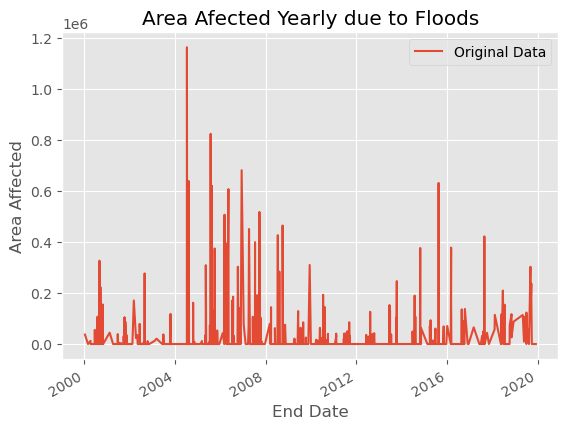

In [241]:
# Raw Time Series
import matplotlib.pyplot as plt

# Plot the original data
df_filtered.plot(x='End Date', y='Area Affected', label='Original Data')


# Set title and labels
plt.title('Area Afected Yearly due to Floods')
plt.xlabel('End Date')
plt.ylabel('Area Affected')

# Display the legend
plt.legend()

# Show the plot
plt.show()


C:\Users\abbur\AppData\Local\Temp\ipykernel_3744\656211805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Resampled Date'] = df_filtered['End Date'].dt.to_period('M').dt.to_timestamp()


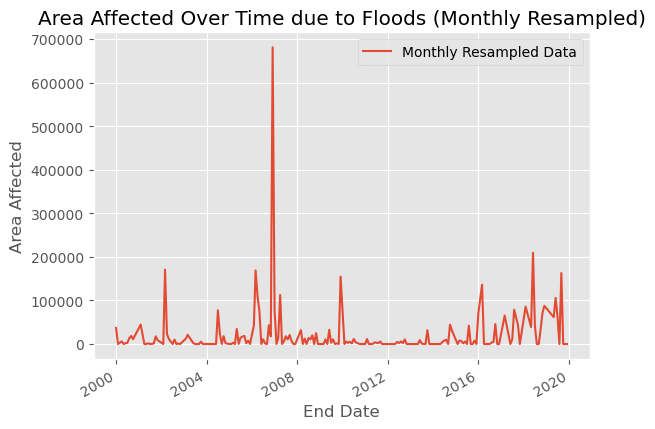

In [242]:
# Create a new column for the resampled datetime values
df_filtered['Resampled Date'] = df_filtered['End Date'].dt.to_period('M').dt.to_timestamp()

# Resample data by month and calculate the mean for each month
df_resampled = df_filtered.groupby('Resampled Date').mean()

# Plot the resampled data
df_resampled.plot(y='Area Affected', label='Monthly Resampled Data')

# Set title and labels
plt.title('Area Affected Over Time due to Floods (Monthly Resampled)')
plt.xlabel('End Date')
plt.ylabel('Area Affected')

# Display the legend
plt.legend()

In [243]:
# Checking the Summary Statistics
df_resampled.describe()

,Area Affected,Human fatality,Human injured
count,198.000000,198.000000,198.000000
mean,20745.070830,18.957215,1.643068
std,58721.713653,44.931819,5.935587
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000
50%,2180.818452,6.666667,0.361818
75%,16418.033272,17.980769,1.440476
max,681019.000000,457.000000,74.740741


In [244]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'df_filtered' is your DataFrame with 'End Date' and 'Area Affected' columns
# Make sure 'End Date' is in datetime format

# Extract the 'Area Affected' column for the Dickey-Fuller test
data_for_test = df_filtered['Area Affected']

# Perform Dickey-Fuller test
result = adfuller(data_for_test)

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")


ADF Statistic: -3.309244887667291
p-value: 0.014470251519131115
Reject the null hypothesis: The time series is stationary.


Months with Spikes:
Index(['January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January',
       ...
       'January', 'January', 'January', 'January', 'January', 'January',
       'January', 'January', 'January', 'January'],
      dtype='object', length=2273)


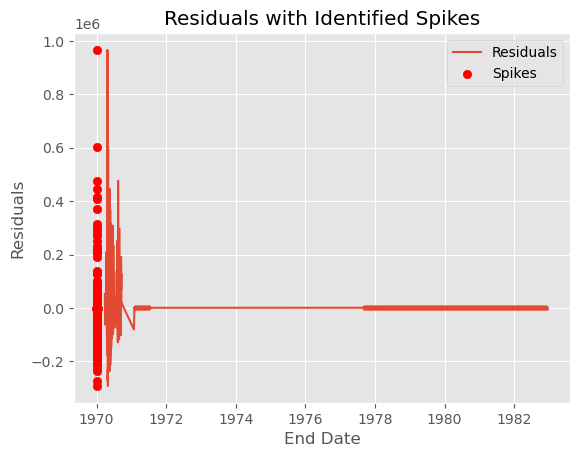

In [246]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


# Extract the 'Area Affected' column for seasonal decomposition
data_for_decomposition = df_filtered['Area Affected']

# Ensure there are no missing values in the data
data_for_decomposition = data_for_decomposition.dropna()

# Perform seasonal decomposition
result = seasonal_decompose(data_for_decomposition, model='additive', period=12)  # Assuming monthly seasonality

# Extract the residual component
residual = result.resid

# Identify spikes using a threshold (adjust the threshold based on your data)
threshold = 1.0  # Example threshold, you may need to adjust this
spikes = residual[abs(residual) > threshold]
spikes.index = pd.to_datetime(spikes.index)
# Print the months with spikes
months_with_spikes = spikes.index.month_name()
print("Months with Spikes:")
print(months_with_spikes)

# Plot the residuals with identified spikes
plt.plot(residual.index, residual, label='Residuals')
plt.scatter(spikes.index, spikes, color='red', label='Spikes')
plt.title('Residuals with Identified Spikes')
plt.xlabel('End Date')
plt.ylabel('Residuals')
plt.legend()
plt.show()





Rolling Average Model 

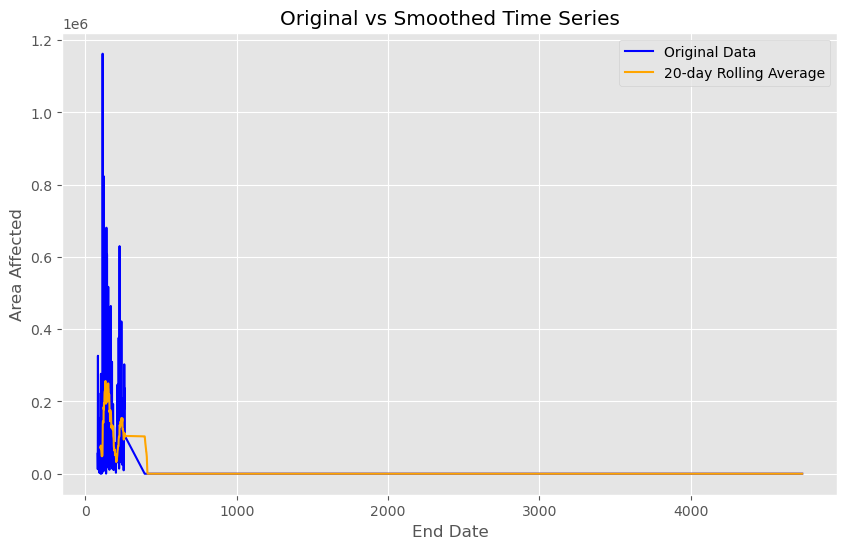

In [247]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the time series data
# Make sure the data is in a single column, and datetime index is set

# Extract the time series data
ts_data = df_filtered['Area Affected']

# Set a window size for the moving average (adjust as needed)
window_size = 20

# Calculate the moving average
rolling_average = ts_data.rolling(window=window_size).mean()

# Visualize the original and smoothed time series
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Original Data', color='blue')
plt.plot(rolling_average, label=f'{window_size}-day Rolling Average', color='orange')
plt.title('Original vs Smoothed Time Series')
plt.xlabel('End Date')
plt.ylabel('Area Affected')
plt.legend()
plt.show()
# Bad smoothening

Exponential Moving Average Model

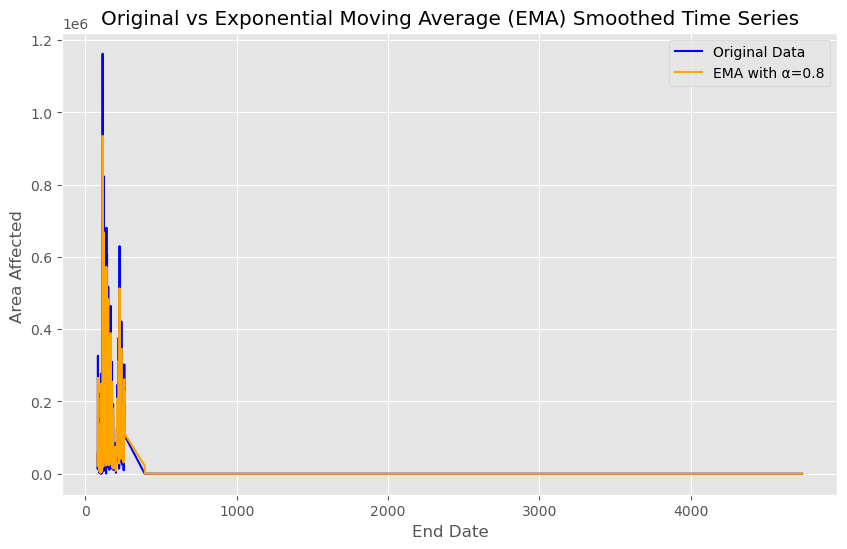

In [248]:

import pandas as pd
import matplotlib.pyplot as plt


# Extract the time series data
ts_data = df_filtered['Area Affected']

# Set the smoothing factor (adjust as needed)
alpha = 0.8

# Calculate the Exponential Moving Average
ema = ts_data.ewm(alpha=alpha, adjust=False).mean()

# Visualize the original and smoothed time series
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Original Data', color='blue')
plt.plot(ema, label=f'EMA with α={alpha}', color='orange')
plt.title('Original vs Exponential Moving Average (EMA) Smoothed Time Series')
plt.xlabel('End Date')
plt.ylabel('Area Affected ')
plt.legend()
plt.show()


Savgol-Golay Filter

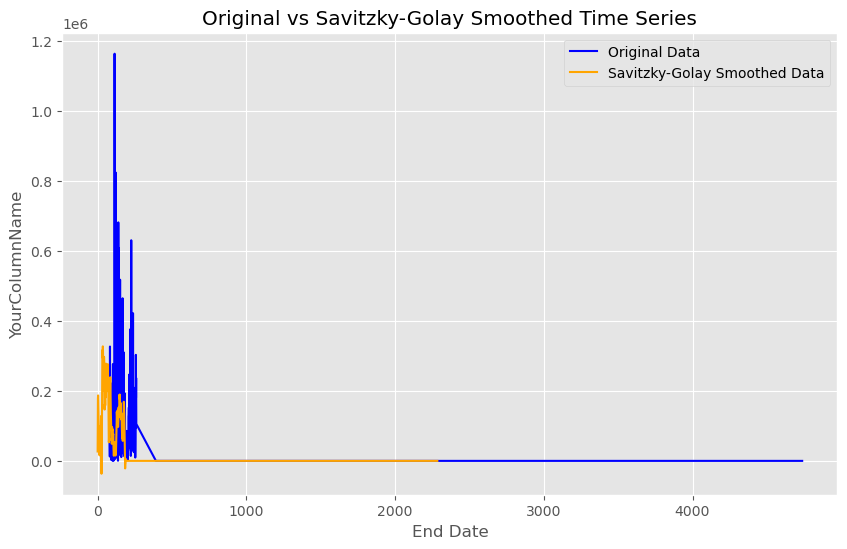

In [249]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter



# Extract the time series data
ts_data = df_filtered['Area Affected']

# Set the window size and polynomial order (adjust as needed)
window_size = 21
poly_order = 5

# Apply the Savitzky-Golay filter
smoothed_data = savgol_filter(ts_data, window_size, poly_order)

# Visualize the original and smoothed time series
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Original Data', color='blue')
plt.plot(smoothed_data, label='Savitzky-Golay Smoothed Data', color='orange')
plt.title('Original vs Savitzky-Golay Smoothed Time Series')
plt.xlabel('End Date')
plt.ylabel('YourColumnName')
plt.legend()
plt.show()


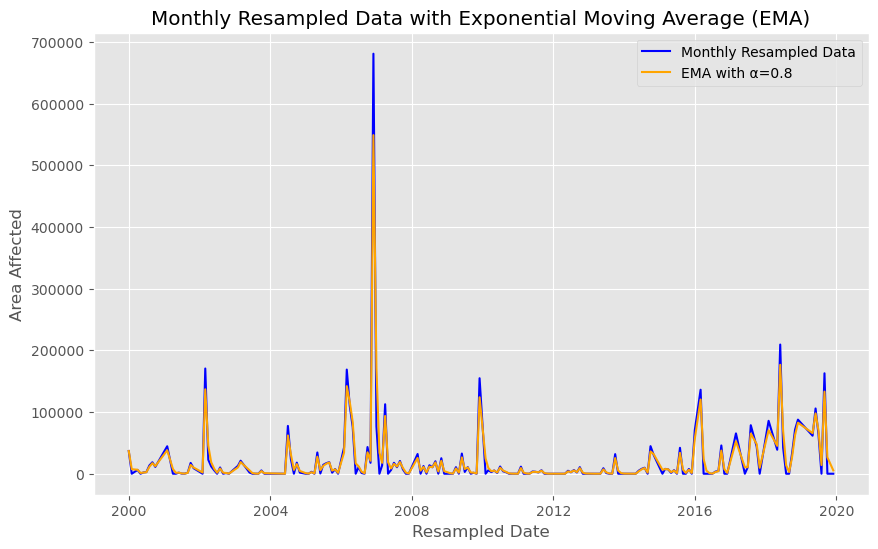

In [250]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_resampled' is your resampled DataFrame
# Make sure 'Resampled Date' is already set as the index

# Extract the time series data
ts_data = df_resampled['Area Affected']

# Set the smoothing factor (adjust as needed)
alpha = 0.8

# Calculate the Exponential Moving Average
ema = ts_data.ewm(alpha=alpha, adjust=False).mean()

# Visualize the resampled data and EMA
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Monthly Resampled Data', color='blue')
plt.plot(ema, label=f'EMA with α={alpha}', color='orange')
plt.title('Monthly Resampled Data with Exponential Moving Average (EMA)')
plt.xlabel('Resampled Date')
plt.ylabel('Area Affected')
plt.legend()
plt.show()


In [251]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'df_filtered' is your DataFrame with 'End Date' and 'Area Affected' columns
# Make sure 'End Date' is in datetime format

# Extract the 'Area Affected' column for the Dickey-Fuller test
data_for_test = df_resampled['Area Affected']

# Perform Dickey-Fuller test
result = adfuller(data_for_test)

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")

ADF Statistic: -12.245616772569521
p-value: 9.799260785637149e-23
Reject the null hypothesis: The time series is stationary.


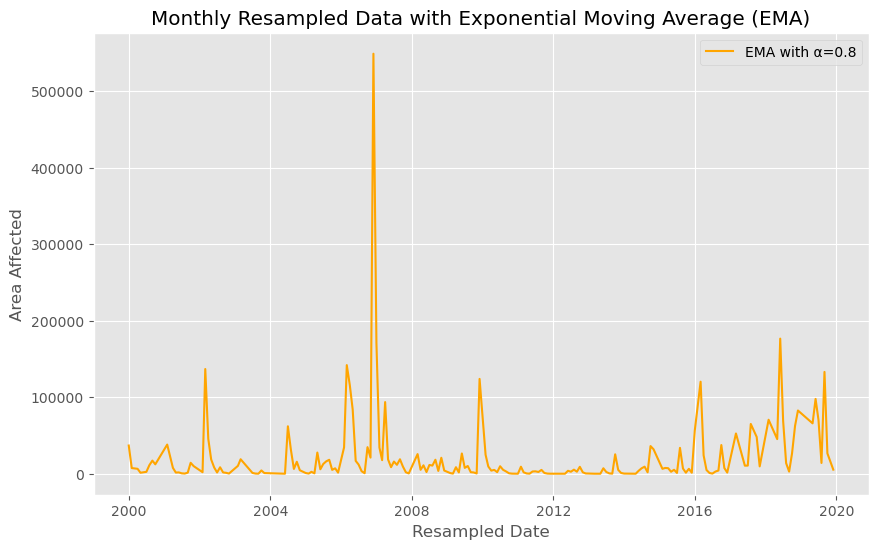

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_resampled' is your resampled DataFrame
# Make sure 'Resampled Date' is already set as the index

# Extract the time series data
ts_data = df_resampled['Area Affected']

# Set the smoothing factor (adjust as needed)
alpha = 0.8

# Calculate the Exponential Moving Average
ema = ts_data.ewm(alpha=alpha, adjust=False).mean()

# Visualize the resampled data and EMA
plt.figure(figsize=(10, 6))
plt.plot(ema, label=f'EMA with α={alpha}', color='orange')
plt.title('Monthly Resampled Data with Exponential Moving Average (EMA)')
plt.xlabel('Resampled Date')
plt.ylabel('Area Affected')
plt.legend()
plt.show()


In [253]:
# find the index which allows us to split off 20% of the data
cutoff = round(ema.shape[0]*0.8)
cutoff

158

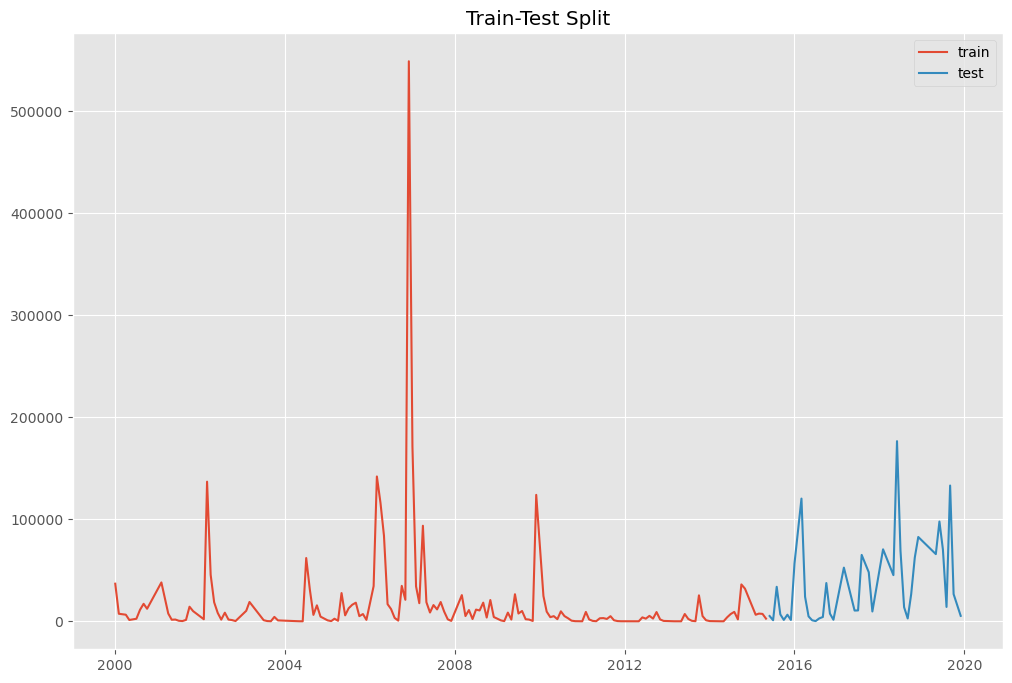

In [255]:
# Define train and test sets according to the index found above
train = ema[:cutoff]

test = ema[cutoff:]

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(train, label='train')
ax.plot(test, label='test')
ax.set_title('Train-Test Split');
plt.legend();

In [257]:
from random import gauss as gs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit

import itertools
#from pmdarima import auto_arima

#statsmodels
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [258]:
split = TimeSeriesSplit()

Naive 

In [259]:
train

Resampled Date
2000-01-01     36854.000000
2000-02-01      7370.800000
2000-04-01      6440.160000
2000-05-01      1288.032000
2000-06-01      1895.710104
2000-07-01      2467.961533
2000-08-01     11221.027601
2000-09-01     17122.738853
2000-10-01     12281.690628
2001-02-01     38077.138126
2001-04-01      7615.427625
2001-05-01      1523.085525
2001-06-01      1711.842105
2001-07-01       505.309597
2001-08-01       210.480101
2001-09-01      1380.896020
2001-10-01     14271.888295
2001-11-01      9942.777659
2002-02-01      1988.555532
2002-03-01    136867.311106
2002-04-01     45543.862221
2002-05-01     18598.372444
2002-06-01      8136.154489
2002-07-01      1627.230898
2002-08-01      8421.760465
2002-09-01      1684.352093
2002-10-01      1203.092641
2002-11-01       240.618528
2003-02-01     10268.923706
2003-03-01     18923.384741
2003-06-01      5322.716948
2003-07-01      1064.543390
2003-08-01       212.908678
2003-09-01        42.581736
2003-10-01      4295.170893
2003-

In [260]:
# we can perform this with the shift operator
# The prediction for the next day is the original series shifted to the future by one day.
naive = train.shift(1)
naive

Resampled Date
2000-01-01              NaN
2000-02-01     36854.000000
2000-04-01      7370.800000
2000-05-01      6440.160000
2000-06-01      1288.032000
2000-07-01      1895.710104
2000-08-01      2467.961533
2000-09-01     11221.027601
2000-10-01     17122.738853
2001-02-01     12281.690628
2001-04-01     38077.138126
2001-05-01      7615.427625
2001-06-01      1523.085525
2001-07-01      1711.842105
2001-08-01       505.309597
2001-09-01       210.480101
2001-10-01      1380.896020
2001-11-01     14271.888295
2002-02-01      9942.777659
2002-03-01      1988.555532
2002-04-01    136867.311106
2002-05-01     45543.862221
2002-06-01     18598.372444
2002-07-01      8136.154489
2002-08-01      1627.230898
2002-09-01      8421.760465
2002-10-01      1684.352093
2002-11-01      1203.092641
2003-02-01       240.618528
2003-03-01     10268.923706
2003-06-01     18923.384741
2003-07-01      5322.716948
2003-08-01      1064.543390
2003-09-01       212.908678
2003-10-01        42.581736
2003-

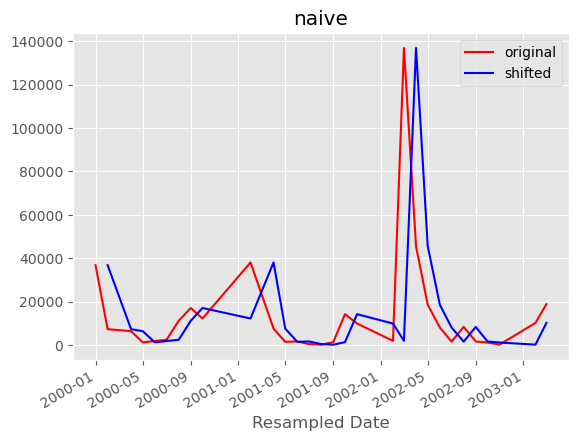

In [261]:
fig, ax = plt.subplots()

train[0:30].plot(ax=ax, c='r', label='original')
naive[0:30].plot(ax=ax, c='b', label='shifted')
ax.set_title('naive')
ax.legend();

In [262]:
np.sqrt(mean_squared_error(train[1:], naive.dropna()))

58793.406375322505

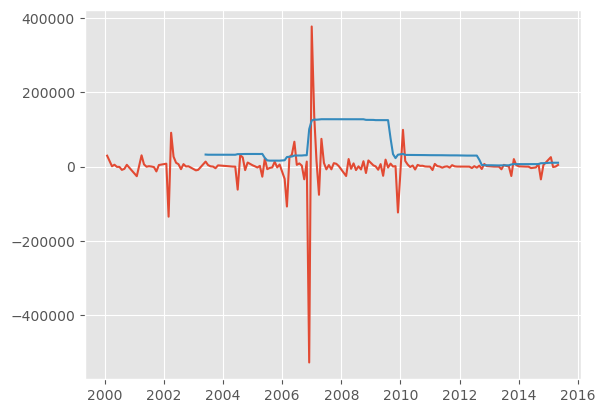

In [263]:
fig, ax = plt.subplots()
residuals = naive[1:] - train[1:]
ax.plot(residuals.index, residuals)
ax.plot(residuals.index, residuals.rolling(30).std());

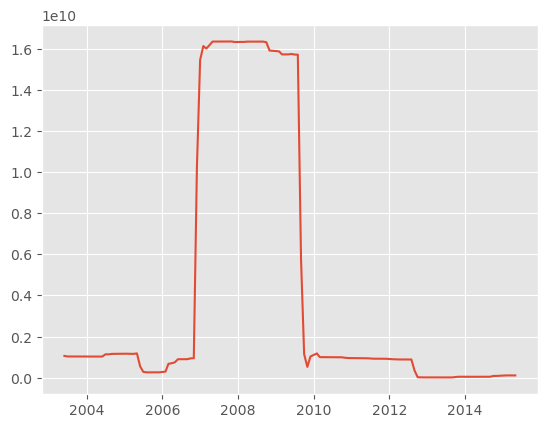

In [264]:
fig, ax = plt.subplots()

ax.plot(residuals.index, residuals.rolling(30).var());

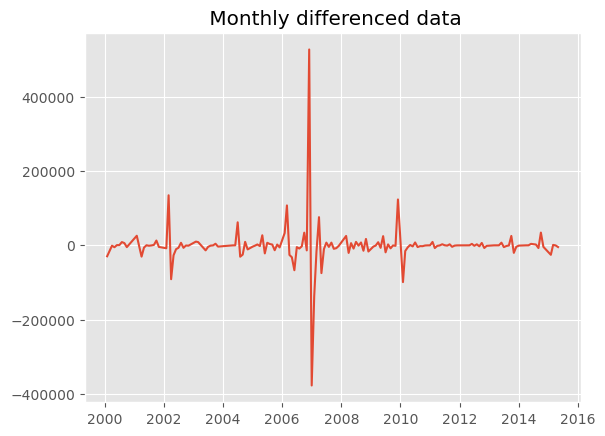

In [265]:
fig, ax = plt.subplots()
ax.plot(train.diff())
ax.set_title(' Monthly differenced data');

In [266]:
p_val = adfuller(train.diff()[1:])[1]
print(f"The p-value associated with the Dickey-Fuller statistical test is {p_val},")
if p_val < 0.05:
    print(" so we can safely assume that the differenced data is stationary.")
else:
    print(" so we cannot reject the null hypothesis that the differenced data is \
not stationary.")

The p-value associated with the Dickey-Fuller statistical test is 7.217866636617635e-14,
 so we can safely assume that the differenced data is stationary.


ARIMA 

In [267]:
ar_1 = ARIMA(train, order=(1, 1, 0)).fit()

# We put a typ='levels' to convert our predictions to remove the differencing performed.
ar_1.predict(typ='levels')

C:\Users\abbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\abbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\abbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Resampled Date
2000-01-01         0.000000
2000-02-01     24378.655536
2000-04-01     17353.947093
2000-05-01      6755.278983
2000-06-01      3032.566232
2000-07-01      1689.947503
2000-08-01      2274.194568
2000-09-01      8257.199181
2000-10-01     15124.392285
2001-02-01     13920.891818
2001-04-01     29342.680987
2001-05-01     17929.902873
2001-06-01      3585.980575
2001-07-01      1647.928259
2001-08-01       913.847053
2001-09-01       310.310724
2001-10-01       984.587808
2001-11-01      9906.939034
2002-02-01     11408.634427
2002-03-01      4681.891720
2002-04-01     91196.744252
2002-05-01     76466.401949
2002-06-01     27722.239187
2002-07-01     11678.709597
2002-08-01      3831.182356
2002-09-01      6121.101510
2002-10-01      3965.669549
2002-11-01      1366.049304
2003-02-01       566.516688
2003-03-01      6873.293459
2003-06-01     15992.944438
2003-07-01      9927.965603
2003-08-01      2506.380537
2003-09-01       501.276107
2003-10-01       100.255221
2003-

In [268]:
ar_1.summary() # Better AIC and RMSE

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Area Affected   No. Observations:                  158
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1937.330
Date:                Fri, 15 Dec 2023   AIC                           3878.661
Time:                        13:20:14   BIC                           3884.773
Sample:                             0   HQIC                          3881.143
                                - 158                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3386      0.021    -16.091      0.000      -0.380      -0.297
sigma2      3.077e+09   1.55e-13   1.98e+22      0.000    3.08e+09    3.08e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.17   Jarque-Bera (JB):             19015.11
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             4.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        56.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.46e+38. Standard errors may be unstable.
"""

In [269]:
y_hat_ar1 = ar_1.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_ar1))

55214.100533955505

In [270]:
random_walk_model = ARIMA(train, order=(0, 1, 0)).fit()
random_walk_model.summary()

C:\Users\abbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\abbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\abbur\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Area Affected   No. Observations:                  158
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1946.915
Date:                Fri, 15 Dec 2023   AIC                           3895.830
Time:                        13:25:23   BIC                           3898.887
Sample:                             0   HQIC                          3897.072
                                - 158                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.435e+09   7.56e+07     45.459      0.000    3.29e+09    3.58e+09
===================================================================================
Ljung-Box (L1) (Q):                  18.22   Jarque-Bera (JB):             16604.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.09   Skew:                             2.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [271]:
y_hat_rw = random_walk_model.predict(typ='levels')
np.sqrt(mean_squared_error(train, y_hat_rw))

58680.34867891933